<a href="https://colab.research.google.com/github/grupo21dex/deliverable-2/blob/main/deliverable2_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas utilizadas:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
import geopy 

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Definição das colunas

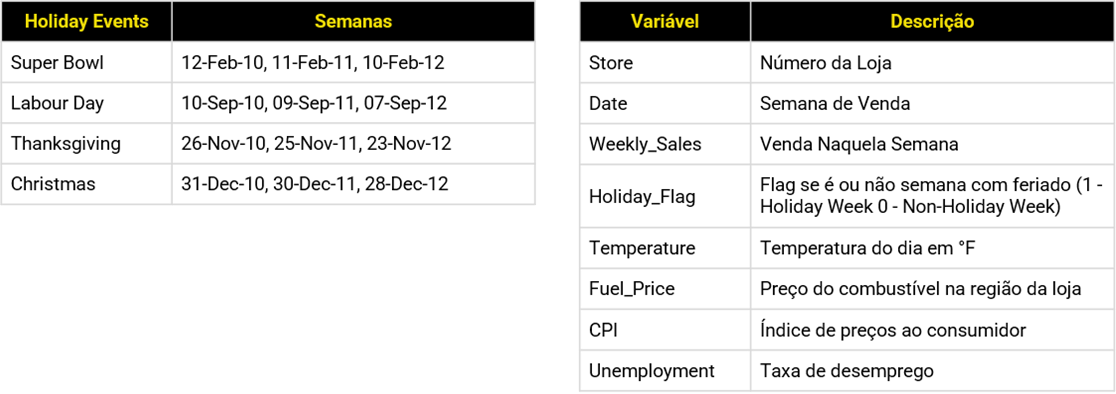

Criando a coluna ***Holiday_type*** que mostra se é dia normal ou feriado

In [9]:
print(df['Date'].dtypes)

object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Verificando se só tem valores 0 e 1 na coluna ***Holiday_Flag***

In [11]:
pd.DataFrame(df['Holiday_Flag'].value_counts())

,Holiday_Flag
0,5985
1,450


In [12]:
len(df)

6435

Criando a lista ***Holiday_Type***

In [29]:
#Super_boul
#Labour_day
#Thanksgiving
#Christmans

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
  if y == 0:
    Holiday_Type.append('Regular_day')
  elif y ==1:
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Holiday_Type.append('Super_Boul')
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Holiday_Type.append('Labour_Day')
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Holiday_Type.append('Thanksgiving')
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Holiday_Type.append('Christmans')




Adicionando a coluna ***Holiday_type*** que diz se é um dia normal ou qual feriado

Criando a coluna ***Holiday_Type*** 

In [30]:
len(Holiday_Type)

6435

In [31]:
df['Holiday_type'] = Holiday_Type

In [32]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_boul,Labour_day,Thanksgiving,Christmans,Holiday_type
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,Regular_day
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,Super_Boul
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,Regular_day
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,Regular_day
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,Regular_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,Regular_day
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,Regular_day
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,Regular_day
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,Regular_day


criando colunas especificas de cada feriado para ficar mais facil buscar os dados do feriado

Arrumar o codigo para ficar menor e mais eficiente

FIzemos um retrabalho aqui!!!!!!

In [25]:
Super_boul = list()
Labour_day = list()
Thanksgiving = list()
Christmans = list()

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Super_boul.append(1)
    else:
      Super_boul.append(0)
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Labour_day.append(1)
    else:
      Labour_day.append(0)
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Thanksgiving.append(1)
    else:
      Thanksgiving.append(0)
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Christmans.append(1)
    else:
      Christmans.append(0)

In [48]:
'''Super_boul = list()
Labour_day = list()
Thanksgiving = list()
Christmans = list()

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Super_boul.append(1)
    elif df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Labour_day.append(1)
    elif df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Thanksgiving.append(1)
    elif df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Christmans.append(1)
    else:
      Super_boul.append(0)
      Labour_day.append(0)
      Thanksgiving.append(0)
      Christmans.append(0)'''

"Super_boul = list()\nLabour_day = list()\nThanksgiving = list()\nChristmans = list()\n\nHoliday_Type = list()\t\nfor x,y in enumerate(df['Holiday_Flag']):\n    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':\n      Super_boul.append(1)\n    elif df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':\n      Labour_day.append(1)\n    elif df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':\n      Thanksgiving.append(1)\n    elif df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':\n      Christmans.append(1)\n    else:\n      Super_boul.append(0)\n      Labour_day.append(0)\n      Thanksgiving.append(0)\n      Christmans.append(0)"

In [15]:
len(Super_boul),len(Labour_day),len(Thanksgiving),len(Christmans)

(6435, 6435, 6435, 6435)

In [16]:
df['Super_boul'] = Super_boul
df['Labour_day'] = Labour_day
df['Thanksgiving'] = Thanksgiving
df['Christmans'] = Christmans

In [52]:
#df['Super_boul'].value_counts(),df['Labour_day'].value_counts(),df['Thanksgiving'].value_counts(),df['Christmans'].value_counts()

In [34]:
df[df['Holiday_type']=='Super_Boul']

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_boul,Labour_day,Thanksgiving,Christmans,Holiday_type
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,Super_Boul
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,1,0,0,0,Super_Boul
105,1,10-02-2012,1802477.43,1,48.02,3.409,220.265178,7.348,1,0,0,0,Super_Boul
144,2,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324,1,0,0,0,Super_Boul
196,2,11-02-2011,2168041.61,1,33.19,3.022,212.592862,8.028,1,0,0,0,Super_Boul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,44,11-02-2011,307486.73,1,30.83,3.034,127.859129,7.224,1,0,0,0,Super_Boul
6254,44,10-02-2012,325377.97,1,33.73,3.116,130.384903,5.774,1,0,0,0,Super_Boul
6293,45,12-02-2010,656988.64,1,27.73,2.773,181.982317,8.992,1,0,0,0,Super_Boul
6345,45,11-02-2011,766456.00,1,30.30,3.239,183.701613,8.549,1,0,0,0,Super_Boul


Fazendo a correlação

Nenhuma correlação relevante

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_boul,Labour_day,Thanksgiving,Christmans
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-6.168883e-18,-2.165876e-16,4.129062e-19,-8.637093e-18
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,8.343093e-03,-1.177047e-03,8.954878e-02,-1.817780e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,5.338539e-01,5.338539e-01,4.343414e-01,4.343414e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,-2.006272e-01,1.109708e-01,-7.687759e-02,-1.505193e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-7.639483e-02,1.807776e-02,-4.734866e-02,-5.162723e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-3.544124e-03,1.988267e-03,-1.824322e-03,-9.723483e-04
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,1.096197e-02,-6.088600e-03,8.927550e-03,8.927550e-03
Super_boul,-6.168883e-18,0.008343,5.338539e-01,-0.200627,-0.076395,-0.003544,0.010962,1.000000e+00,-2.142857e-02,-1.743420e-02,-1.743420e-02
Labour_day,-2.165876e-16,-0.001177,5.338539e-01,0.110971,0.018078,0.001988,-0.006089,-2.142857e-02,1.000000e+00,-1.743420e-02,-1.743420e-02
Thanksgiving,4.129062e-19,0.089549,4.343414e-01,-0.076878,-0.047349,-0.001824,0.008928,-1.743420e-02,-1.743420e-02,1.000000e+00,-1.418440e-02


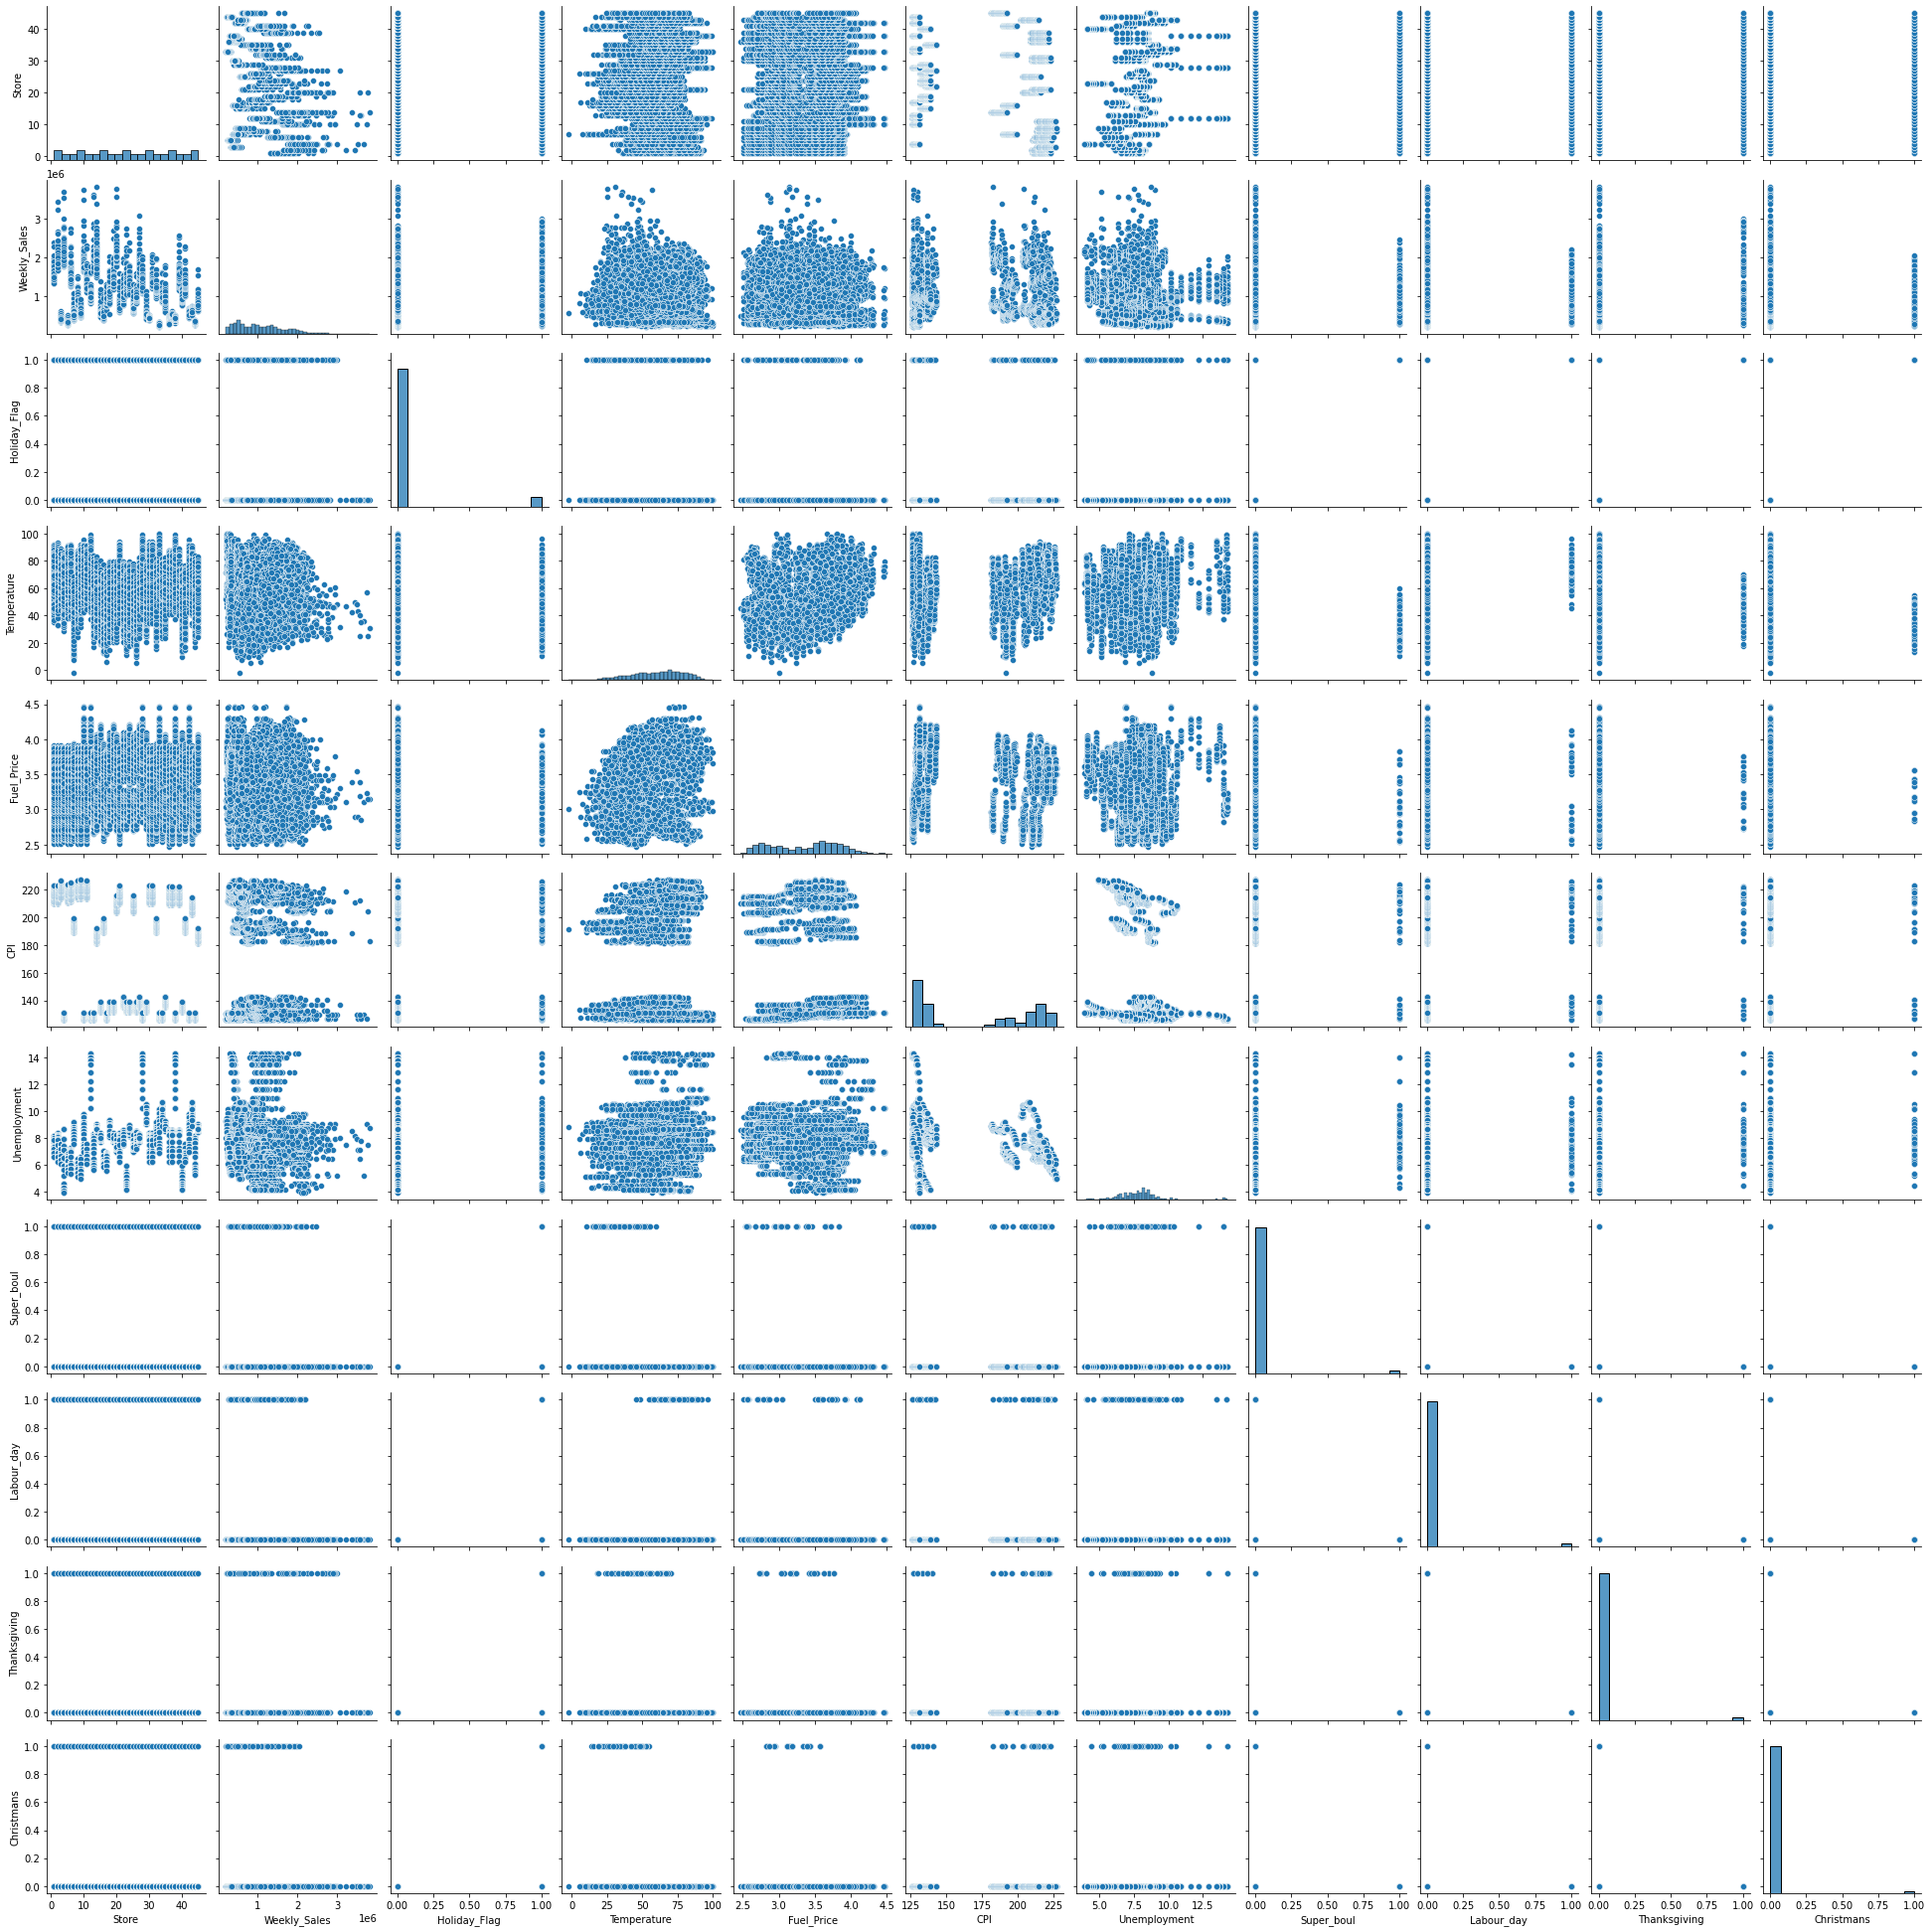

In [54]:
'''sns.pairplot(df)
df.corr()'''

In [35]:
df.corr()['Weekly_Sales']

Store          -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Super_boul      0.008343
Labour_day     -0.001177
Thanksgiving    0.089549
Christmans     -0.018178
Name: Weekly_Sales, dtype: float64

Colocando em ordem decrescente usando a coluna ***Weekly_Sales*** para ver as semanas que tiveram mais vendas

In [56]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type,Super_boul,Labour_day,Thanksgiving,Christmans
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Regular_day,0,0,0,0
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul,1,0,0,0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Regular_day,0,0,0,0
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Regular_day,0,0,0,0
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Regular_day,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Regular_day,0,0,0,0
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Regular_day,0,0,0,0
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Regular_day,0,0,0,0
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Regular_day,0,0,0,0


In [36]:
#df_Thanksgiving.sort_values(by=['Weekly_Sales'],ascending=False)

NameError: ignored

In [37]:
df.sort_values(by=['Weekly_Sales'],ascending=False).head(30)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_boul,Labour_day,Thanksgiving,Christmans,Holiday_type
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724,0,0,0,0,Regular_day
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484,0,0,0,0,Regular_day
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003,0,0,0,0,Regular_day
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143,0,0,0,0,Regular_day
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795,0,0,0,0,Regular_day
1814,13,23-12-2011,3556766.03,0,24.76,3.186,129.984548,6.392,0,0,0,0,Regular_day
2815,20,23-12-2011,3555371.03,0,40.19,3.389,212.236040,7.082,0,0,0,0,Regular_day
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127,0,0,0,0,Regular_day
1385,10,23-12-2011,3487986.89,0,48.36,3.541,129.984548,7.874,0,0,0,0,Regular_day
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163,0,0,0,0,Regular_day


Grafico de barras com as comparações de vendas em feriados com dias normais

---

colocar a soma da venda de cada feriado e a soma do dia normal, criar um gráfico de barras mostrando cada um

In [38]:
df['Holiday_type'].drop_duplicates()

0      Regular_day
1       Super_Boul
31      Labour_Day
42    Thanksgiving
47      Christmans
Name: Holiday_type, dtype: object

verificando a qtdd de dias de cada tipo de dia

In [39]:
df['Holiday_type'].value_counts()

Regular_day     5985
Super_Boul       135
Labour_Day       135
Thanksgiving      90
Christmans        90
Name: Holiday_type, dtype: int64

Somando todas as vendas e separando pelo tipo da semana

In [40]:
df_regular = df[df['Holiday_type'] == 'Regular_day'].groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).head(3)
df_regular

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,2.057453e+08,69.087669,3.229729,216.031272,7.601722
2,2.545898e+08,69.025263,3.229729,215.680620,7.617120
3,5.320862e+07,72.076617,3.229729,219.426602,7.171338


Criando data frames para cada feriado com as informações desse feriado 

In [41]:
df_super = df[df['Holiday_type'] == 'Super_Boul'].groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).head(3)

In [42]:
df_labour = df[df['Holiday_type'] == 'Labour_Day'].groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).head(3)

In [43]:
df_thanks = df[df['Holiday_type'] == 'Thanksgiving'].groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).head(3)

In [44]:
df_christ = df[df['Holiday_type'] == 'Christmans'].groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'}).head(3)
df_christ

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,2864782.73,46.490,3.036,215.470461,7.8520
2,3624661.07,45.935,3.036,215.121040,7.8020
3,793231.64,50.745,3.036,218.853865,7.3805


grafico de barras comparando os feriados

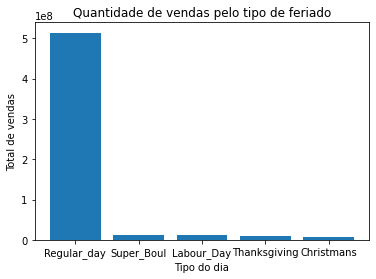

In [45]:
#sns.barplot(x = df['Holiday_type'].value_counts(), y = 'Weekly_Sales', data = df)
day_type = ['Regular_day','Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_sales = [df_regular['Weekly_Sales'].sum(),df_super['Weekly_Sales'].sum(),df_labour['Weekly_Sales'].sum(),df_thanks['Weekly_Sales'].sum(),df_christ['Weekly_Sales'].sum()]

plt.bar(day_type, total_sales)
plt.title('Quantidade de vendas pelo tipo de feriado')
plt.xlabel('Tipo do dia')
plt.ylabel('Total de vendas')
plt.show()

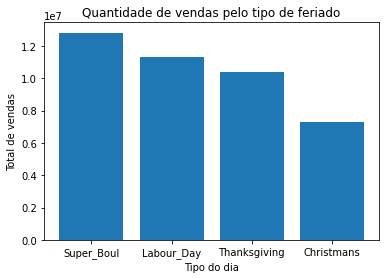

In [46]:
holiday_type = ['Super_Boul','Labour_Day','Thanksgiving','Christmans']
total_holiday = [df_super['Weekly_Sales'].sum(),df_labour['Weekly_Sales'].sum(),df_thanks['Weekly_Sales'].sum(),df_christ['Weekly_Sales'].sum()]

plt.bar(holiday_type, total_holiday)
plt.title('Quantidade de vendas pelo tipo de feriado')
plt.xlabel('Tipo do dia')
plt.ylabel('Total de vendas')
plt.show()

In [47]:

df_super['Weekly_Sales'].sum()+df_labour['Weekly_Sales'].sum()+df_thanks['Weekly_Sales'].sum()+df_christ['Weekly_Sales'].sum()

41828256.059999995

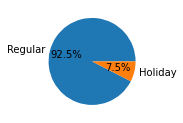

In [57]:

fig = plt.figure(figsize =(2,2))
plt.pie([df_regular['Weekly_Sales'].sum(),df_super['Weekly_Sales'].sum()+df_labour['Weekly_Sales'].sum()+df_thanks['Weekly_Sales'].sum()+df_christ['Weekly_Sales'].sum()], labels = ['Regular','Holiday'],autopct='%1.1f%%')
 

plt.show()

---

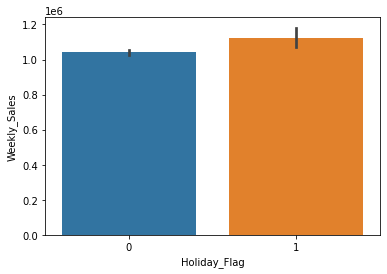

In [62]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

Gráfico da quantidade de semanas comuns  e feriados 

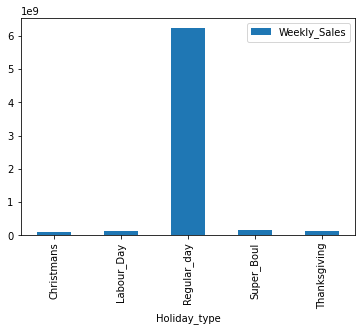

In [59]:
df.groupby(['Holiday_type']).sum().plot(kind='bar', y='Weekly_Sales')

"plt.pie(np.array([df['Holiday_Flag'].]))\nplt.show()"

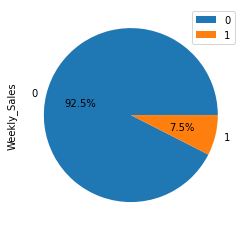

In [56]:
df.groupby(['Holiday_Flag']).sum().plot(kind='pie', y='Weekly_Sales',autopct='%1.1f%%')
'''plt.pie(np.array([df['Holiday_Flag'].]))
plt.show()''' 

Grafico das vendas por feriados

In [52]:
df.groupby('Store')['Weekly_Sales'].sum()

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

Media das colunas

In [60]:
df.groupby('Store').agg({'Weekly_Sales':'mean','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,1.555264e+06,68.306783,3.219699,215.996892,7.610420
2,1.925751e+06,68.216364,3.219699,215.646311,7.623846
3,4.027044e+05,71.434196,3.219699,219.391531,7.176986
4,2.094713e+06,62.253357,3.216972,128.679669,5.964692
5,3.180118e+05,69.410140,3.219699,216.565581,6.295406
6,1.564728e+06,69.700000,3.219699,217.553197,6.606902
7,5.706173e+05,39.720280,3.241559,193.664243,8.585734
8,9.087495e+05,62.513986,3.219699,219.439026,6.091846
9,5.439806e+05,67.775175,3.219699,219.626689,6.099881


Verificando qual loja teve mais vendas, fazer somatorio das vendas de cada loja(e as medias das colunas relevantes)

In [53]:
df_lojas = df.groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean', 'CPI':'mean','Unemployment':'mean'})
df_lojas

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
1,2.224028e+08,68.306783,3.219699,215.996892,7.610420
2,2.753824e+08,68.216364,3.219699,215.646311,7.623846
3,5.758674e+07,71.434196,3.219699,219.391531,7.176986
4,2.995440e+08,62.253357,3.216972,128.679669,5.964692
5,4.547569e+07,69.410140,3.219699,216.565581,6.295406
6,2.237561e+08,69.700000,3.219699,217.553197,6.606902
7,8.159828e+07,39.720280,3.241559,193.664243,8.585734
8,1.299512e+08,62.513986,3.219699,219.439026,6.091846
9,7.778922e+07,67.775175,3.219699,219.626689,6.099881


Verificando as lojas que possuem mais vendas

In [54]:
df_lojas.sort_values(by= ['Weekly_Sales'], ascending = False).head(3)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
20,3.013978e+08,55.451399,3.417608,209.038131,7.371413
4,2.995440e+08,62.253357,3.216972,128.679669,5.964692
14,2.889999e+08,57.790979,3.417608,186.285678,8.648748


Verificando as lojas que vendem menos

In [55]:
df_lojas.sort_values(by= ['Weekly_Sales'], ascending =True).head(3)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,
33,37160221.96,76.728182,3.575923,128.679669,8.533154
44,43293087.84,53.697133,3.286147,128.679669,6.735622
5,45475688.90,69.410140,3.219699,216.565581,6.295406


---

Fazer relatório em power point, com graficos insights e decisões, com apresentação do projeto???

O Índice de Preços ao Consumidor (IPC) mede a variação de preços de um conjunto fixo de bens e serviços componentes de despesas habituais de famílias com nível de renda situado entre 1 e 33 salários mínimos mensais.

Verifica-se que os feriados nao exercem mta influencia para as vendas, obs verificar proximidades com o feriado(ex: as maiores vendas foram nos dias 23 e 24, considerou natal dias 28,30 e 31, não podemos só olhar o dia dos feriados precisaremos ver a proximidade)

"essas remarcações precedem feriados importantes, os quatro maiores de todos, que são (os 4 marcados) as semanas que incluem esses feriados tem um peso maior"

Verificar se as lojas proximas aos acontecimentos especificos dos feriados exercem alguma influencia na venda(ex no feriado do ***Super_Boul*** as lojas proximas ao local ocorre mais influencia desse feriado): Precisa conseguir os endereços das lojas e dos acontecimentos do feriado



Pq estão pedindo tanto destaque com feriados se precisamos considerar as lojas que mais vendem o ano inteiro já que o aumento da loja é uma mudança permanente

fazer somatorio de todas as ***Weekly_Sales*** por loja para identificar as que tiveram maior volume de vendas

Regiao x desemprego x populacao da regiao*

quantidade de venda pelo tamanho da loja: pesquisar se é possivel conseguir esse dado:

Usar os feriados para avaliar o crescimento nas vendas e usar esse crescimento como forma de avaliar a loja que precisa mais da expansão

o aumento das vendas em si não mostra o porque a loja precisa de expansão, assim como sua venda

---

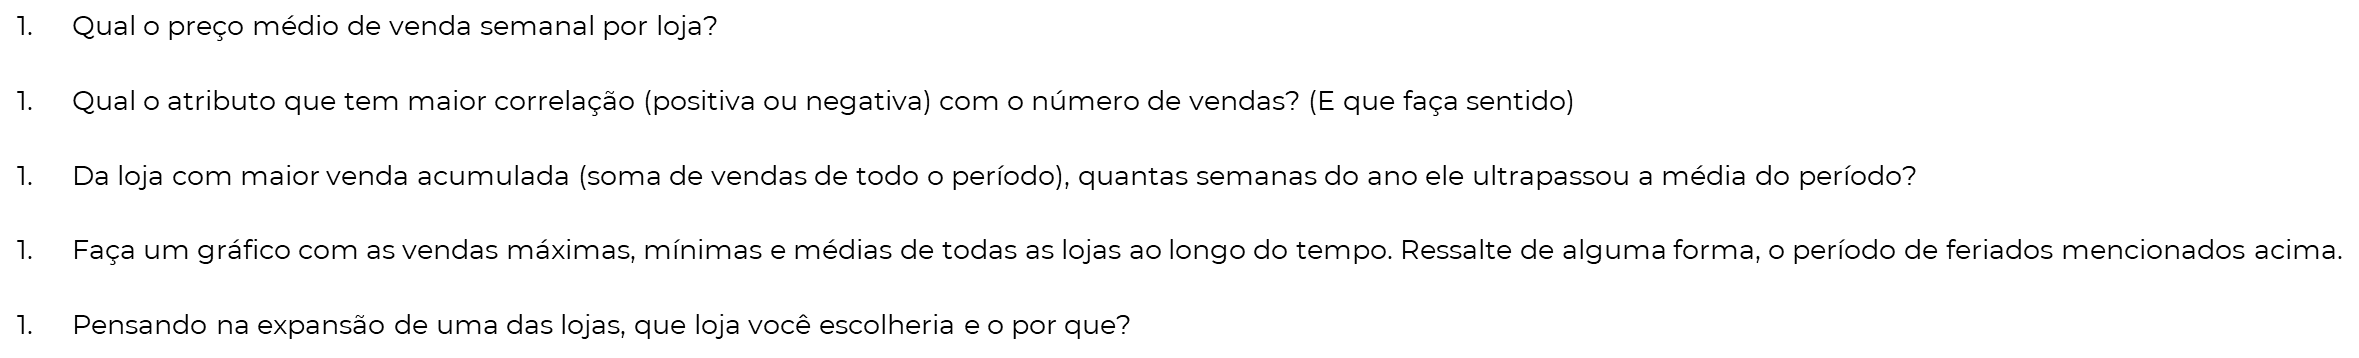